## Histogram


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import matplotlib
from scipy.stats import expon


In [2]:

df = pd.read_csv("politicians_tweet_data.csv", index_col = 0)
print(df.head())

      direct_reply  year     month_sin     month_cos  time_since_posted  \
2344             0  2018  8.660254e-01  5.000000e-01       3.967647e+06   
4778             0  2017 -2.449294e-16  1.000000e+00       1.070855e+07   
3469             0  2018  1.000000e+00  6.123234e-17       1.359352e+06   
4117             0  2018  1.000000e+00  6.123234e-17       8.550776e+05   
5036             0  2018  1.000000e+00  6.123234e-17       1.327644e+06   

      is_quote  hashtags  user_mentions  medias  urls  english  favourites  \
2344         0         0              1       0     0        1           0   
4778         0         0              1       1     0        1           0   
3469         0         0              1       0     0        1           0   
4117         0         0              1       0     0        1           0   
5036         0         1              1       1     0        1           0   

      happy_words  sad_words  retweets  
2344            5          0    454056 

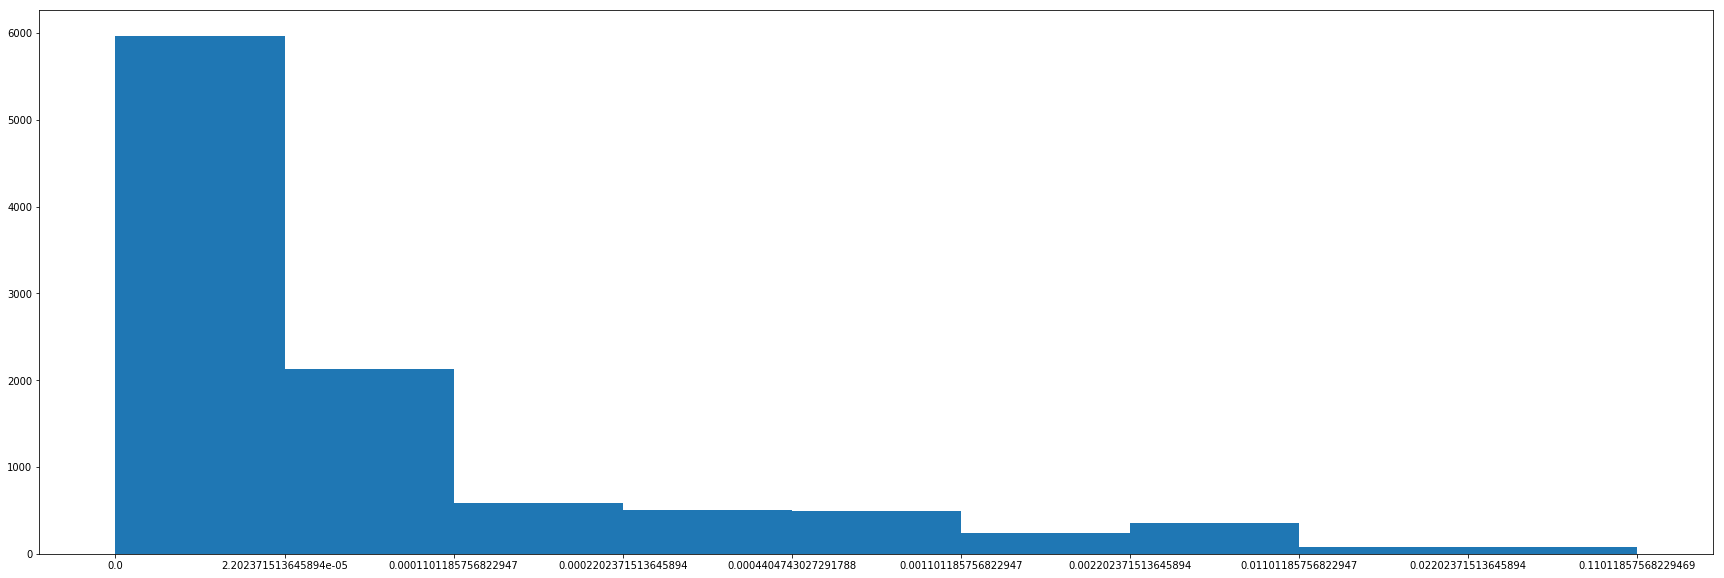

In [31]:
retweets = df.loc[:,"retweets"]
min_tweet = min(retweets)
max_tweet = max(retweets)
tweet_range = max_tweet - min_tweet
retweets = (retweets - min_tweet) / (tweet_range)
edges = [0,10,50,100,200,500,1000,5000,10000,50000]
edges = [(i - min_tweet) / tweet_range for i in edges]
range_edg = range(len(edges))
#get hist counts
hist, _ = np.histogram(retweets, bins=edges)
#print(hist)
#min_count = min(hist)
#max_count = max(hist)
#count_range = max_count - min_count
#hist = [(i - min_count) / count_range for i in hist]
#use the hist counts to generate numbers in each bin in "range_edg"
peudo_num = [np.repeat(range_edg[x], hist[x]) for x in range(len(hist))]
combined_nums = np.concatenate(peudo_num)
#draw the peudo_num hist to simulate the original histogram
#matplotlib.rcParams["figure.figsize"] = [30, 10]
plt.hist(combined_nums, bins=range_edg)
plt.xticks(range_edg, edges)
#print(expon.pdf(edges) * count_range)
#plt.plot(edges * (edges[-1] - edges[0]), expon.pdf(edges) * count_range, 'r-', lw=5, alpha=0.6)
plt.show()